# 1. Setup


In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.1/107.7 GB disk)


# 2. Dataset


In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="bC3NGxSPmxgBKehWDMpc")
project = rf.workspace("yolo-rh90o").project("dataset-for-yolo-cse-233")
version = project.version(5)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 107.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Dataset-for-YOLO-CSE-233--5 in yolov11:: 100%|██████████| 3316/3316 [00:00<00:00, 5155.49it/s]


# 3. Merged Dataset Script

In [ ]:
import os
import glob

# Define dataset paths
datasets_root = "/content/"
dataset_paths = [
    "Dataset-for-YOLO-CSE-233--5",
    "data-2"
]

# Define the class mappings (update based on both datasets)
label_map = {
    "Dataset-for-YOLO-CSE-233--5": {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5},  # Existing dataset mapping
    "data-2": {0: 6, 1: 6}  # Boat -> 6, Ship -> 6 (Both merged into 'ship')
}

# Iterate through all dataset directories
for dataset in dataset_paths:
    for split in ["train", "valid", "test"]:
        labels_dir = os.path.join(datasets_root, dataset, split, "labels")

        # Ensure label directory exists
        if not os.path.exists(labels_dir):
            print(f" Skipping {dataset}/{split}, labels not found.")
            continue

        # Iterate over all `.txt` annotation files
        label_files = glob.glob(os.path.join(labels_dir, "*.txt"))

        for label_file in label_files:
            new_lines = []
            with open(label_file, "r") as f:
                lines = f.readlines()

            # Update class IDs based on mapping
            for line in lines:
                parts = line.strip().split()
                old_class = int(parts[0])

                if old_class in label_map[dataset]:
                    new_class = label_map[dataset][old_class]
                    parts[0] = str(new_class)  # Update class ID
                    new_lines.append(" ".join(parts))

            # Overwrite the file with updated labels
            with open(label_file, "w") as f:
                f.write("\n".join(new_lines))

            print(f"Updated labels in {label_file}")

print("\n Label Update Completed Successfully! All 'boat' labels are now 'ship'.")


# 4. Train


In [ ]:
# Train YOLO11n on custom dataset for 19 epochs
!yolo train model=yolo11n.pt data=/content/Dataset-for-YOLO-CSE-233--5/data.yaml epochs=19 imgsz=640

#5. Predit


image 1/1 /content/Dataset-for-YOLO-CSE-233--5/valid/images/set10_image60_jpg.rf.b5ae1c40f9259764503dcdf3eac89a76.jpg: 640x640 1 fire, 2 smokes, 350.8ms
Speed: 4.0ms preprocess, 350.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


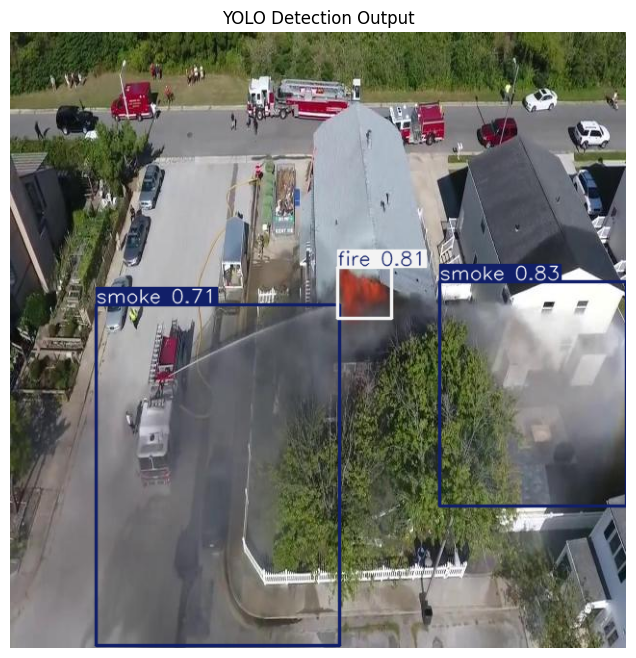

In [ ]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load the trained YOLO model jjjj
model = YOLO('/content/best.pt')

# Path to test image
image_path = "/content/Dataset-for-YOLO-CSE-233--5/valid/images/set10_image60_jpg.rf.b5ae1c40f9259764503dcdf3eac89a76.jpg"

# Run YOLO inference
results = model(image_path)  # Set confidence threshold

# Extract the detected image
annotated_image = results[0].plot()  # Get the image with bounding boxes

# Convert to RGB format for displaying in Matplotlib
image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize=(10, 8))
plt.imshow(image_rgb)
plt.axis("off")
plt.title("YOLO Detection Output")
plt.show()


In [ ]:
!openai api usage

usage: openai api [-h]
                  {chat.completions.create,images.generate,images.edit,images.create_variation,audio.transcriptions.create,audio.translations.create,files.create,files.retrieve,files.delete,files.list,models.list,models.retrieve,models.delete,completions.create}
                  ...
openai api: error: argument {chat.completions.create,images.generate,images.edit,images.create_variation,audio.transcriptions.create,audio.translations.create,files.create,files.retrieve,files.delete,files.list,models.list,models.retrieve,models.delete,completions.create}: invalid choice: 'usage' (choose from 'chat.completions.create', 'images.generate', 'images.edit', 'images.create_variation', 'audio.transcriptions.create', 'audio.translations.create', 'files.create', 'files.retrieve', 'files.delete', 'files.list', 'models.list', 'models.retrieve', 'models.delete', 'completions.create')



image 1/1 /content/Dataset-for-YOLO-CSE-233--5/valid/images/set10_image97_jpg.rf.d7d64ee1513855b38fb6c1f7ed3ad67e.jpg: 640x640 1 fire, 2 rooftops, 1 smoke, 340.0ms
Speed: 10.5ms preprocess, 340.0ms inference, 20.7ms postprocess per image at shape (1, 3, 640, 640)


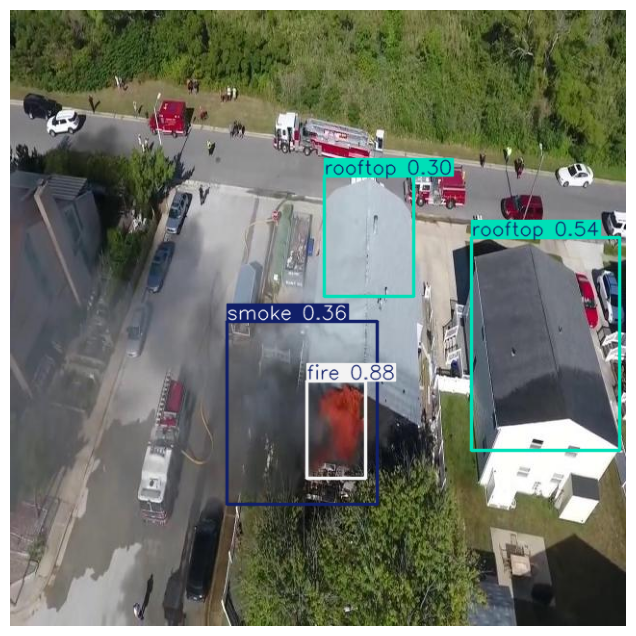

In [ ]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load the trained YOLO model
model = YOLO('/content/best.pt')

# Path to test image
image_path = "/content/Dataset-for-YOLO-CSE-233--5/valid/images/set10_image97_jpg.rf.d7d64ee1513855b38fb6c1f7ed3ad67e.jpg"

# Run YOLO inference
results = model(image_path, conf=0.2)

# Extract the detected image
annotated_image = results[0].plot()

# Convert to RGB format for displaying in Matplotlib
image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize=(10, 8))
plt.imshow(image_rgb)  # <-- This line was missing
plt.axis('off')        # Optional: remove axes for cleaner look
plt.show()


# Desgin Experiment


Processing Image: /content/Dataset-for-YOLO-CSE-233--5/train/images/istockphoto-1146004878-612x612_jpg.rf.2721cb2d073dd9d88f77d01b64a9b252.jpg

image 1/1 /content/Dataset-for-YOLO-CSE-233--5/train/images/istockphoto-1146004878-612x612_jpg.rf.2721cb2d073dd9d88f77d01b64a9b252.jpg: 640x640 1 fire, 2 rooftops, 343.4ms
Speed: 4.1ms preprocess, 343.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
checking if calling
(0.15183179080486298, 0.7737922668457031)
Extracted Safe Spot from Text: 0.15183179080486298, 0.7737922668457031
🔍 Calling LLM for Full Image Safe Spot...
🔄 Raw LLM Response:
{
  "landing_coordinates": {
    "x": 0.75,
    "y": 0.30
  }
}
✅ Extracted Safe Spot from Text: (0.75, 0.3)
LLM-Only Safe Spot: (0.75, 0.3)
LLM Safe Spot: 0.15183179080486298, 0.7737922668457031
LLM Safe Spot: 0.15183179080486298, 0.7737922668457031
LLM Safe Spot: 0.15183179080486298, 0.7737922668457031
kkkkkkkkkkkkkkkkkkkkkkkkkk
0.5124890804290771
0.9291737079620361
1.2003097534179688


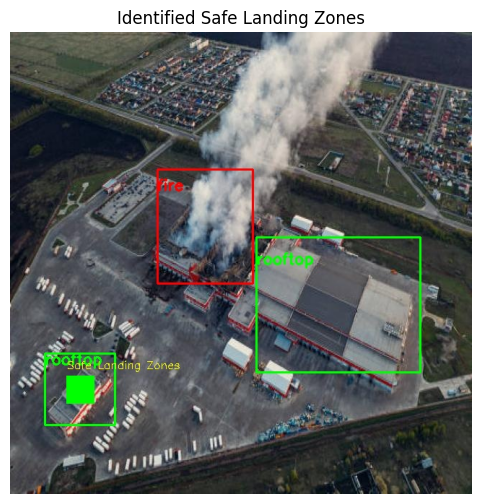

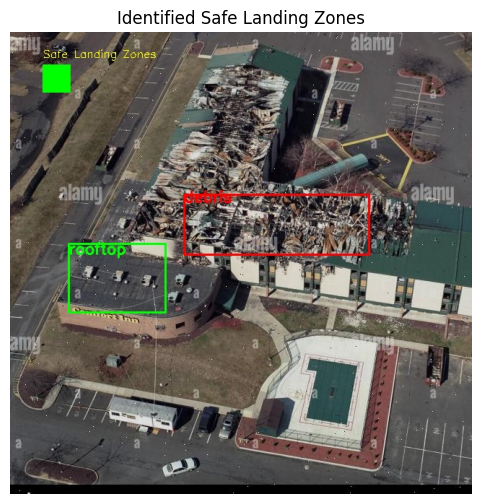

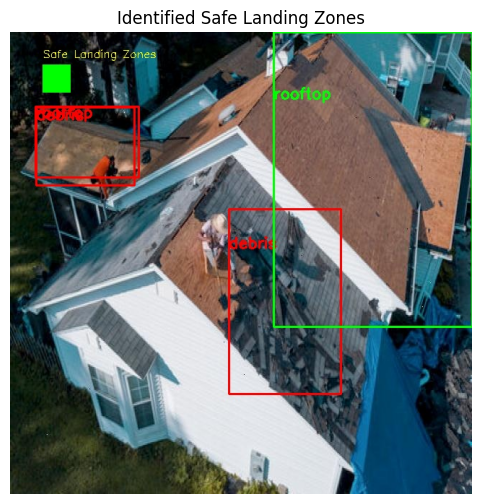

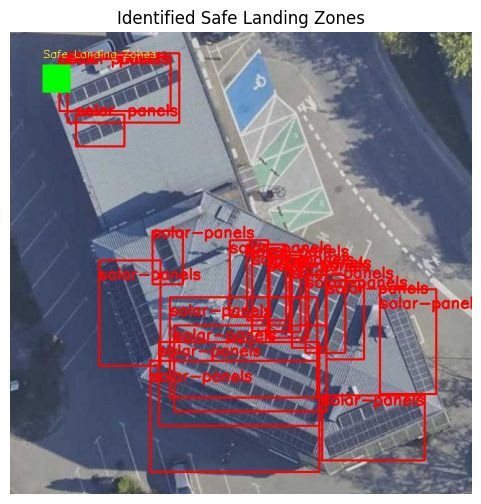

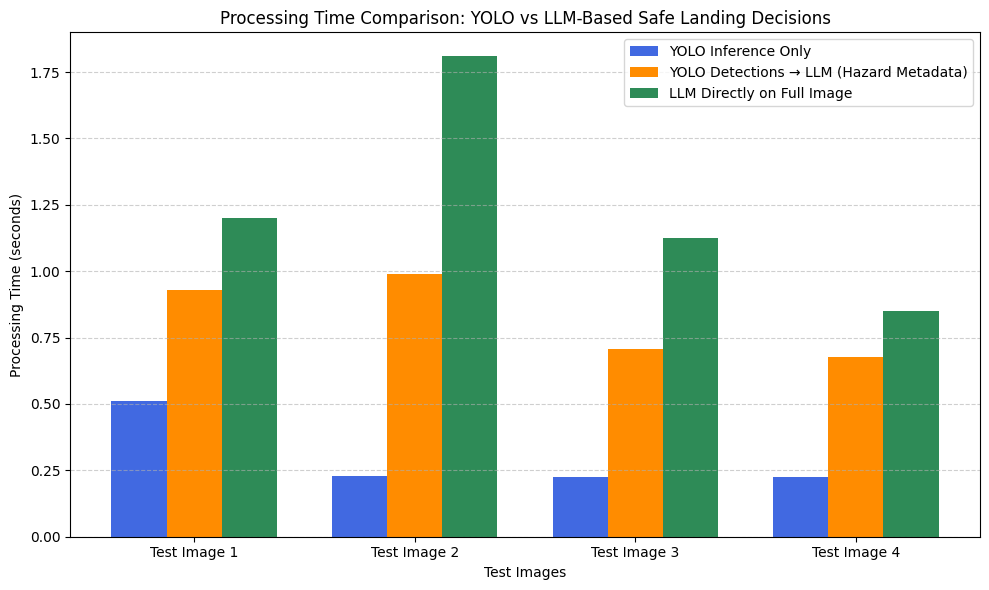

In [ ]:
import os
import time
import json
import cv2
import openai
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
from openai import OpenAI

OPENAI_API_KEY = "sk-"
#  Load OpenAI API Key Securely - workisssng on iiiii important
client = OpenAI(api_key=OPENAI_API_KEY)
none_safe_zone=True
#  Load trained YOLO model
model = YOLO("/content/best.pt")

#  Define path to test images
test_images_dir = "/content/Dataset-for-YOLO-CSE-233--1/valid/images"
test_images = ["/content/Dataset-for-YOLO-CSE-233--5/train/images/istockphoto-1146004878-612x612_jpg.rf.2721cb2d073dd9d88f77d01b64a9b252.jpg","/content/Dataset-for-YOLO-CSE-233--5/train/images/aerial-view-of-fire-damage-damaged-building-usa-AN316C_jpg.rf.2d7b8d24fd2af76b3357f5e590d7dfea.jpg","/content/Dataset-for-YOLO-CSE-233--5/train/images/360_F_533139934_2ZcsFB7KkkHcVaVzWsFHxRYU0rTtYCrm_jpg.rf.aff16d2dc7ddaa416831afb0b9b7c948.jpg", "/content/Dataset-for-YOLO-CSE-233--5/train/images/Zrzut-ekranu-2024-11-26-211803_png.rf.285045a81a3f5caff346d1509ce32023.jpg"]

#  Experiment Results Storage
results_data = []
output_images_dir = "/content/outpsimages/1"
os.makedirs(output_images_dir, exist_ok=True)

#  Class Definitions
SAFE_CLASSES = ["rooftop", "ship"]
HAZARD_CLASSES = ["fire", "smoke", "debris", "solar-panels"]

#  YOLO Detection Function
def yolo_detect(image_path):
    results = model(image_path, conf=0.4)
    detections = []

    for i, box in enumerate(results[0].boxes.xywhn.cpu().numpy()):
        x, y, w, h = map(float, box[:4])
        class_id = int(results[0].boxes.cls[i].item())
        class_name = model.names[class_id]
        detections.append({"class": class_name, "x": x, "y": y, "w": w, "h": h})

    return detections

#  Function to Check if a Rooftop is Safe
def is_safe_rooftop(rooftop, hazard_detections):
    rx1, ry1, rw, rh = rooftop["x"], rooftop["y"], rooftop["w"], rooftop["h"]
    rx2, ry2 = rx1 + rw, ry1 + rh  # Bottom right corner

    # Define 4 corners of the rooftop
    corners = [
        (rx1, ry1),  # Top-left
        (rx2, ry1),  # Top-right
        (rx1, ry2),  # Bottom-left
        (rx2, ry2)   # Bottom-right
    ]

    def is_point_inside_box(px, py, bx1, by1, bx2, by2):
        """Check if a point (px, py) is inside a bounding box (bx1, by1, bx2, by2)."""
        return bx1 <= px <= bx2 and by1 <= py <= by2

    for hazard in hazard_detections:
        hx1, hy1, hw, hh = hazard["x"], hazard["y"], hazard["w"], hazard["h"]
        hx2, hy2 = hx1 + hw, hy1 + hh  # Bottom right of hazard box
        hx_center, hy_center = hx1 + hw / 2, hy1 + hh / 2  # Hazard center

        #  Condition 1: At least 3 rooftop corners must be outside hazards
        outside_count = sum(not is_point_inside_box(px, py, hx1, hy1, hx2, hy2) for px, py in corners)
        if outside_count < 3:
            return False  #  Unsafe (too much overlap with hazards)

        #  Condition 2: No hazard center should be inside the rooftop
        if is_point_inside_box(hx_center, hy_center, rx1, ry1, rx2, ry2):
            return False  #  Unsafe (hazard inside rooftop)
    none_safe_zone=False
    return True  #  Safe rooftop (at least 3 corners outside and no hazards inside)


#  LLM Decision Function (Safe Landing Selection)
def ask_llm_for_safe_landing(safe_rooftops):

    print("checking if calling")
    prompt = f"""
     We have detected multiple hazardous areas in the image, including fire, smoke, debris, and other obstructions.
    The detected hazardous coordinates are as follows:
    {json.dumps(safe_rooftops, indent=4)}

    Your task is to determine the safest possible landing spot for a drone while strictly following these conditions:

    1. **Avoid Hazardous Zones:**
      - The landing spot must not be within any of the provided hazardous coordinates.
      - It must be at a safe distance from fire, smoke, or debris to ensure a secure landing.

    2. **Select a Rooftop or Ship (if available):**
      - If rooftops or ships exist in the image, prioritize landing on them.
      stricly outside hazardous coordinates
    3. **Final Output - Coordinates for Safe Landing:**
      - Provide the final (x, y) coordinates of the best possible landing spot.
      - The coordinates must be in **normalized format** (ranging between 0 to 1) relative to the image size.

    Ensure that the final coordinates strictly meet the above safety criteria and do not overlap with any hazardous region provided in the list.
    and those final coordinates strictly outside hazardous bounding box coordinates, and only give there coordinates with no explination, retrun coordinates
    """

    try:
        response = client.chat.completions.create(
            model="gpt-4-turbo",
            messages=[{"role": "system", "content": "You are an expert drone navigation assistant."},
                      {"role": "user", "content": prompt}]
        )
        response_text = response.choices[0].message.content
        print(response_text)
        return response_text, extract_coordinates(response_text)
    except Exception as e:
        return f"Error: {str(e)}", None

#  Extract Safe Coordinates from LLM Response
import re

import re

import re
import json
timing_results = []
def extract_coordinates(response_text):
    # Try parsing as JSON
    try:
        response_json = json.loads(response_text)
        if "x" in response_json and "y" in response_json:
            x, y = float(response_json["x"]), float(response_json["y"])
            print(f"Extracted Safe Spot from JSON: {x}, {y}")  # Debugging output
            return (x, y)
    except json.JSONDecodeError:
        pass  # If JSON parsing fails, continue to regex

    # Try matching coordinates in free text format (fallback)
    match = re.search(r"x\s*=\s*([0-9.]+)[, ]+\s*y\s*=\s*([0-9.]+)", response_text)
    if not match:
        match = re.search(r"([0-9.]+)[, ]+([0-9.]+)", response_text)

    if match:
        x, y = float(match.group(1)), float(match.group(2))
        print(f"Extracted Safe Spot from Text: {x}, {y}")  # Debugging output
        return (x, y)

    print("Failed to extract coordinates from LLM response.")  # Debugging output
    return None

# Measure Processing Time
def measure_processing_time(func, *args):
    start_time = time.time()
    result = func(*args)  # Capture function output
    end_time = time.time()
    elapsed_time = end_time - start_time

    # Ensure function output is a tuple
    if not isinstance(result, tuple):
        result = (result,)

    return (elapsed_time,) + result  # Ensure timing result + function output as a tuple


def ask_llm_full_image(image_path):
    """Requests a safe landing spot from LLM for the full image, ensuring three return values."""

    print("🔍 Calling LLM for Full Image Safe Spot...")

    prompt = f"""
    You are analyzing an aerial image to find the safest drone landing spot.
{json.dumps(image_path, indent=4)}
     **Instructions:**
    1. Identify a **clear landing area** that is strickly  from **any hazards (fire, smoke, debris, solar panels).**
    2. **Output ONLY the landing coordinates** in this strict coordinates:
    3. **Do not include any explanations** or additional text. Only return the JSON.
        4. **Final Output - Coordinates for Safe Landing:**
      - Provide the final (x, y) coordinates of the best possible landing spot.
      - The coordinates must be in **normalized format** (ranging between 0 to 1) relative to the image size.
    """

    start_time = time.time()

    try:
        response = client.chat.completions.create(
            model="gpt-4-turbo",
            messages=[{"role": "system", "content": "You are an expert drone navigation assistant."},
                      {"role": "user", "content": prompt}]
        )

        response_text = response.choices[0].message.content
        print(f" Raw LLM Response:\n{response_text}")

        safe_spot = extract_coordinatess(response_text)
        end_time = time.time()
        elapsed_time = end_time - start_time

        return response_text, safe_spot, elapsed_time  #  Returns 3 values

    except Exception as e:
        print(f" LLM Error: {str(e)}")
        return f"Error: {str(e)}", None, 0.0  #  Returns 3 values even in error case

import json
import re

def extract_coordinatess(response_text):
    """Extracts safe landing coordinates from LLM response."""

    #  Try parsing JSON directly
    try:
        response_json = json.loads(response_text.strip("```json\n").strip("```"))  # Handle markdown JSON formatting
        if "x" in response_json and "y" in response_json:
            x, y = float(response_json["x"]), float(response_json["y"])
            print(f" Extracted Safe Spot from JSON: ({x}, {y})")
            return x, y
    except json.JSONDecodeError:
        print(" Failed to parse JSON from LLM response. Trying regex fallback...")

    #  Try extracting coordinates using regex if JSON parsing fails
    match = re.search(r'"x"\s*:\s*([0-9.]+)\s*,\s*"y"\s*:\s*([0-9.]+)', response_text)
    if match:
        x, y = float(match.group(1)), float(match.group(2))
        print(f"n✅ Extracted Safe Spot from Text: ({x}, {y})")
        return x, y

    print(" LLM did not provide valid coordinates. Defaulting to None.")
    return None


#  Image Processing Function

def plot_landing_zone(image_path, yolo_detections, safe_spot, output_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Define colors
    hazard_color = (255, 0, 0)  #  Red for Fire, Smoke, Debris
    unsafe_rooftop_color = (255, 0, 0)  #  Red for Rooftops overlapping hazards
    safe_rooftop_color = (0, 255, 0)  #  Green for Safe Rooftops

    hazard_detections = [d for d in yolo_detections if d["class"] in HAZARD_CLASSES]
    rooftop_detections = [d for d in yolo_detections if d["class"] == "rooftop"]

    for det in yolo_detections:
        x, y, w, h = det["x"], det["y"], det["w"], det["h"]
        class_name = det["class"]

        if class_name in HAZARD_CLASSES:
            color = hazard_color  # Hazard is always red
        elif class_name == "rooftop":
            color = safe_rooftop_color if is_safe_rooftop(det, hazard_detections) else unsafe_rooftop_color
            none_safe_zone=False
        else:
            continue
        cv2.rectangle(img, (int((x-w/2)*img.shape[1]), int((y-h/2)*img.shape[0])),
                      (int((x+w/2)*img.shape[1]), int((y+h/2)*img.shape[0])), color, 2)
        cv2.putText(img, class_name, (int((x-w/2)*img.shape[1]), int((y-h/4)*img.shape[0]) - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2)
        if safe_spot:
            x, y = safe_spot
            print(f"LLM Safe Spot: {x}, {y}")  # Debugging output

            center_x = int(x * img.shape[1])
            center_y = int(y * img.shape[0])

            # Ensure coordinates are within bounds
            center_x = max(5, min(center_x, img.shape[1] - 5))
            center_y = max(5, min(center_y, img.shape[0] - 5))

            top_left = (center_x - 19, center_y - 19)
            bottom_right = (center_x + 19, center_y + 19)

            # Draw the green box
            cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), thickness=-1)
            cv2.putText(img, "Safe Landing Zones", (top_left[0], top_left[1] - 10),
            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (254, 255, 0), 1)

    output_file = os.path.join(output_path, os.path.basename(image_path))
    cv2.imwrite(output_file, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
    return output_file
timing_results = []
#  Run Experiment on Multiple Images
for img_path in test_images:
    print(f"\nProcessing Image: {img_path}")
    # yolo_time, yolo_detections = measure_processing_time(yolo_detect, img_path)

    # Measure LLM Processing Time
    # llm_time, safe_spot = measure_processing_time(ask_llm_for_safe_landing, yolo_detections)
    # timing_results.append({"Image": img_path, "YOLO Time": yolo_time, "LLM Time": llm_time})
    # print(";;;;;;;;;;;;;;;;;;;;;")
    # print(yolo_time)
    # print(llm_time)
    # yolo_detections = yolo_detect(img_path)
    # yolo_time, yolo_detections = measure_processing_time(yolo_detect, img_path)
    # hazard_detections = [d for d in yolo_detections if d["class"] in HAZARD_CLASSES]

    # safe_rooftops = [
    #     d for d in yolo_detections
    #     if d["class"] == "rooftop" and is_safe_rooftop(d, hazard_detections)
    # ]

    # if not safe_rooftops:
    #     # llm_output, safe_spot = ask_llm_for_safe_landing(yolo_detections)
    #     print("yyyyyyyyyyyyyyyyyyyy")
    #     llm_hazard_time, llm_output, safe_spot = measure_processing_time(ask_llm_for_safe_landing, yolo_detections)

    #     print(f"Extracted Safe Spot: {safe_spot}")
    # else:
    #     llm_output, safe_spot = "Safe rooftop(s) found. LLM not called.", None

    yolo_time, yolo_detections = measure_processing_time(yolo_detect, img_path)
    llm_hazard_time, llm_output, safe_spot = measure_processing_time(ask_llm_for_safe_landing, yolo_detections)
    results = measure_processing_time(ask_llm_full_image, img_path)
    llm_full_time, llm_output_full, safe_spot_full = results[:3]  # Unpack only the first 3 values

    # llm_output_full, safe_spot_full, llm_time_full = ask_llm_full_image(img_path)
    print(f"LLM-Only Safe Spot: {safe_spot_full}")

    processed_img_path = plot_landing_zone(img_path, yolo_detections, safe_spot, output_images_dir)
    print("kkkkkkkkkkkkkkkkkkkkkkkkkk")
    print(yolo_time)
    print(llm_hazard_time)
    print(llm_full_time)
    print("kkkkkkkkkkkkkkkkkkkkkkkkkk")

    results_data.append({
        "Image": img_path,
        "Processed Image": processed_img_path,
        "YOLO Detection": yolo_detections,
        "LLM Decision": llm_output
    })
    #  Store timing results for later analysis
    timing_results.append({
        "Image": img_path,
        "YOLO Time (s)": yolo_time,
        "LLM (Hazard) Time (s)": llm_hazard_time,
        "LLM (Full) Time (s)": llm_full_time,
    })



#  Display Processed Images
for result in results_data:
    img = cv2.imread(result["Processed Image"])
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Identified Safe Landing Zones")
    plt.axis("off")
    plt.show()
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Convert timing results into DataFrame
df = pd.DataFrame(timing_results)

# Create generic labels: Test Image 1, Test Image 2, ...
df["Image Label"] = [f"Test Image {i+1}" for i in range(len(df))]

# X-axis positions
x = np.arange(len(df))
bar_width = 0.25

# Plotting
plt.figure(figsize=(10, 6))

plt.bar(x - bar_width, df["YOLO Time (s)"], width=bar_width, label="YOLO Inference Only", color="royalblue")
plt.bar(x, df["LLM (Hazard) Time (s)"], width=bar_width, label="YOLO Detections → LLM (Hazard Metadata)", color="darkorange")
plt.bar(x + bar_width, df["LLM (Full) Time (s)"], width=bar_width, label="LLM Directly on Full Image", color="seagreen")

# Labels and Aesthetics
plt.xlabel("Test Images")
plt.ylabel("Processing Time (seconds)")
plt.title("Processing Time Comparison: YOLO vs LLM-Based Safe Landing Decisions")
plt.xticks(x, df["Image Label"], rotation=0)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


